In [ ]:
#Importing Necessary Libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/ML101_train_dataset.csv"
df=pd.read_csv(path)

Visualizing Training Data

In [ ]:
df.head()


,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Gender,Height,Weight,Cholesterol level,Blood Sugar level,Systolic BP,Diastolic BP,LifeStyle
0,15725.0,6.518042,1714.0,56.0,Male,178.416872,75.489346,185.408550,104.442836,172.813045,75.552416,Average
1,6733.0,9.176300,2508.0,69.0,Female,176.826592,54.635484,191.698148,NaN,198.729261,-103.634282,Average
2,7424.0,4.856772,1366.0,46.0,Male,182.281966,63.578372,212.625051,106.649132,172.905053,87.816911,Bad
3,11853.0,9.727244,2189.0,32.0,Female,NaN,59.397202,205.440351,121.982302,204.527361,99.791603,NaN
4,7521.0,6.433183,2342.0,NaN,NaN,145.273232,62.574740,161.368583,126.408787,187.882666,88.240932,Average


In [ ]:
df.columns

Index(['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP', 'Diastolic BP', 'LifeStyle'],
      dtype='object')

In [ ]:
df_content=df[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']].copy()

In [ ]:
df_content.head()


,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Gender,Height,Weight,Cholesterol level,Blood Sugar level
0,15725.0,6.518042,1714.0,56.0,Male,178.416872,75.489346,185.408550,104.442836
1,6733.0,9.176300,2508.0,69.0,Female,176.826592,54.635484,191.698148,NaN
2,7424.0,4.856772,1366.0,46.0,Male,182.281966,63.578372,212.625051,106.649132
3,11853.0,9.727244,2189.0,32.0,Female,NaN,59.397202,205.440351,121.982302
4,7521.0,6.433183,2342.0,NaN,NaN,145.273232,62.574740,161.368583,126.408787


In [ ]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average Daily Steps  90000 non-null  float64
 1   Hours of Sleep       90000 non-null  float64
 2   Caloric Intake       90000 non-null  float64
 3   Age                  90000 non-null  float64
 4   Gender               90000 non-null  object 
 5   Height               90000 non-null  float64
 6   Weight               90000 non-null  float64
 7   Cholesterol level    90000 non-null  float64
 8   Blood Sugar level    90000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 6.9+ MB


In [ ]:
df_content["Gender"] = np.where(df_content["Gender"] == "Female", 0, 1)

In [ ]:
df_content.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Average Daily Steps  90000 non-null   float64
 1   Hours of Sleep       90000 non-null   float64
 2   Caloric Intake       90000 non-null   float64
 3   Age                  90000 non-null   float64
 4   Gender               100000 non-null  int64  
 5   Height               90000 non-null   float64
 6   Weight               90000 non-null   float64
 7   Cholesterol level    90000 non-null   float64
 8   Blood Sugar level    90000 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 6.9 MB


In [ ]:
import seaborn as sns

<Axes: >

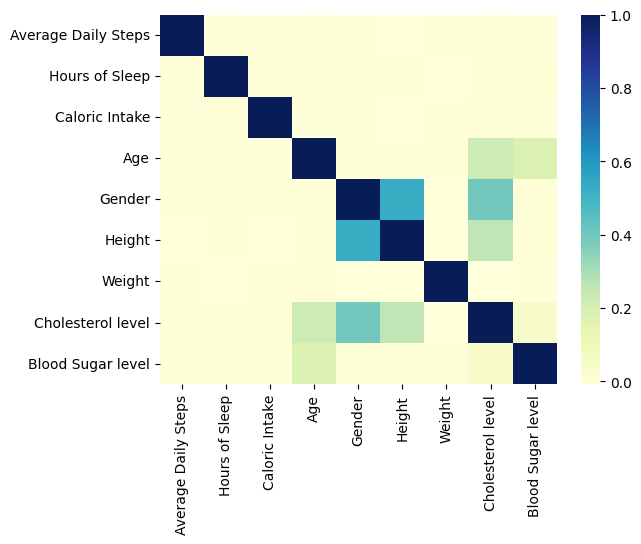

In [ ]:
sns.heatmap((df_content.corr(numeric_only=False)),cmap="YlGnBu")  #Visualizing correlation between different input attributes

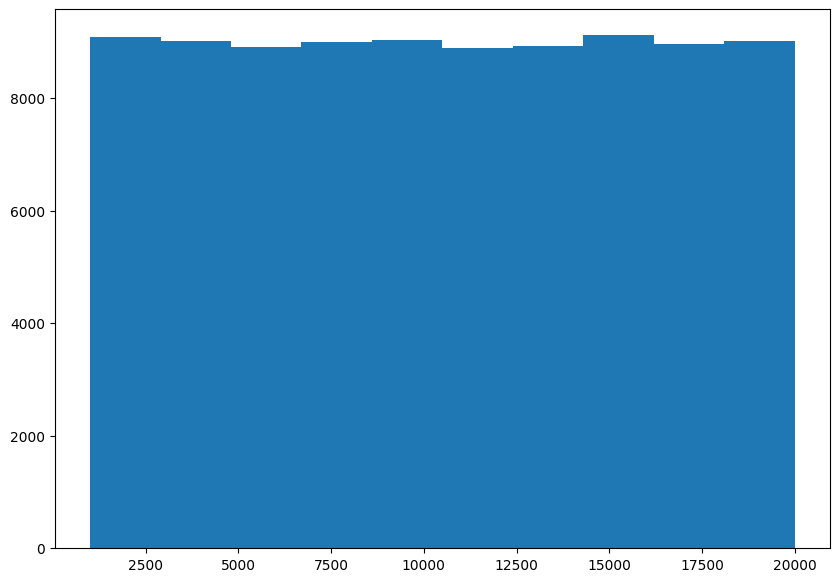

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['Average Daily Steps'])
plt.show()

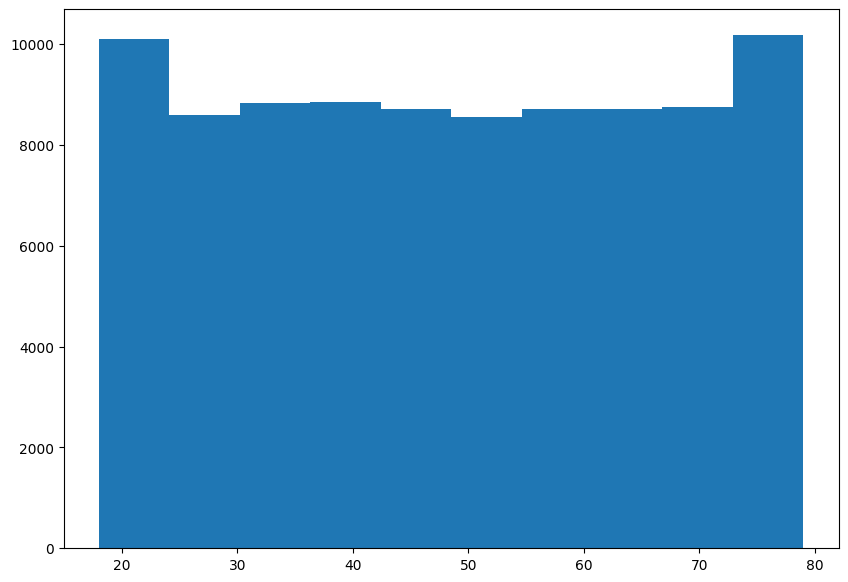

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['Age'])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

DATA PREPROCESSING

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


       Average Daily Steps  Hours of Sleep  Caloric Intake   Age  Gender  \
0                  15725.0        6.518042          1714.0  56.0    Male   
1                   6733.0        9.176300          2508.0  69.0  Female   
2                   7424.0        4.856772          1366.0  46.0    Male   
3                  11853.0        9.727244          2189.0  32.0  Female   
4                   7521.0        6.433183          2342.0  28.5  Female   
...                    ...             ...             ...   ...     ...   
99995               2265.0        7.842720          2030.0  53.0    Male   
99996              10959.0        9.661165          2233.0  22.0    Male   
99997              11534.5        7.378317          2080.0  37.0    Male   
99998              12110.0        9.843323          1434.0  72.0  Female   
99999              18618.0        9.301179          3458.0  37.0    Male   

           Height      Weight  Cholesterol level  Blood Sugar level  
0      178.416872

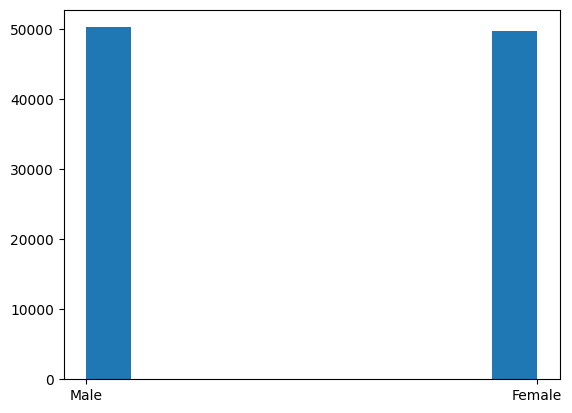

In [ ]:

#Filling the NaN Values

df_interpolate=df[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']].copy()

columns_to_replace_nan = [ 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']


# Iterate through each column and replace NaN with the mean of the columns which have a Gaussian like distribution

for column in columns_to_replace_nan:
    mean_value = df_interpolate[column].mean()
    df_interpolate[column].fillna(mean_value, inplace=True)


# Linearly Interpolating to fill NaN values for attributes with uniform distribution
columns_to_interpolate = ['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age']
df_interpolate[columns_to_interpolate] = df_interpolate[columns_to_interpolate].interpolate(method='linear')

df_missing = df_interpolate[df_interpolate['Gender'].isna()]
df_not_missing = df_interpolate[~df_interpolate['Gender'].isna()]
logistic_regression = LogisticRegression()


#Using Logistic regression classifier to fill categorical data in Gender column

logistic_regression.fit(df_not_missing[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']], df_not_missing['Gender'])

predicted_values = logistic_regression.predict(df_missing[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']])

df_interpolate.loc[df_interpolate['Gender'].isna(), 'Gender'] = predicted_values

print(df_interpolate)
plt.hist(df_interpolate['Gender'])


df_interpolate['Systolic BP']=df['Systolic BP']
df_interpolate['Diastolic BP']=df['Diastolic BP']
df_interpolate['LifeStyle']=df['LifeStyle']

In [ ]:
df_c_interpolated_KNN=df[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']].copy()

(array([1.9000e+01, 4.4600e+02, 3.3800e+03, 1.3628e+04, 2.7192e+04,
        3.7500e+04, 1.3954e+04, 3.4300e+03, 4.2800e+02, 2.3000e+01]),
 array([  5.47885693,  18.37088561,  31.26291429,  44.15494297,
         57.04697166,  69.93900034,  82.83102902,  95.7230577 ,
        108.61508638, 121.50711507, 134.39914375]),
 <BarContainer object of 10 artists>)

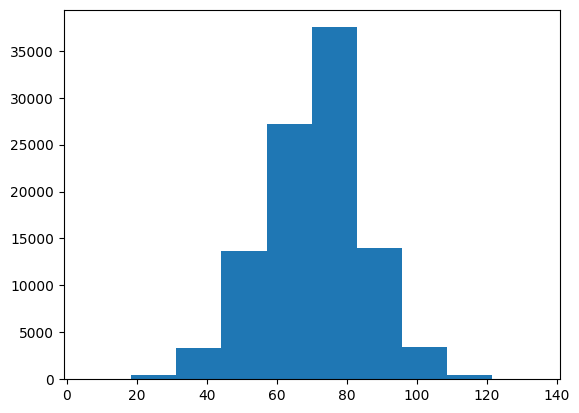

In [ ]:
columns_to_replace_nan = [ 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']

# Iterate through each column and replace NaN with the mean of that column
for column in columns_to_replace_nan:
    mean_value = df_c_interpolated_KNN[column].mean()
    df_c_interpolated_KNN[column].fillna(mean_value, inplace=True)


df_c_interpolated_KNN.isnull().sum()
plt.hist(df_c_interpolated_KNN['Weight'])

In [ ]:
df_c_interpolated_KNN.isnull().sum()

Average Daily Steps    10000
Hours of Sleep         10000
Caloric Intake         10000
Age                    10000
Gender                 10000
Height                     0
Weight                     0
Cholesterol level          0
Blood Sugar level          0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:

#Using KNNimputer for uniform distribution NaN value replacement

columns_to_interpolate_KNN = ['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']

X = df_c_interpolated_KNN[columns_to_interpolate_KNN]

array = X.values

imputer = KNNImputer(n_neighbors=11, weights="uniform")

df_imputed_array = imputer.fit_transform(array)

df_corrected = pd.DataFrame(data=df_imputed_array, columns=columns_to_interpolate_KNN)

print(df_corrected)

#We made two datasets one with KNN imputer and other with Linerar interpolation to check which works better



       Average Daily Steps  Hours of Sleep  Caloric Intake        Age  \
0             15725.000000        6.518042          1714.0  56.000000   
1              6733.000000        9.176300          2508.0  69.000000   
2              7424.000000        4.856772          1366.0  46.000000   
3             11853.000000        9.727244          2189.0  32.000000   
4              7521.000000        6.433183          2342.0  50.545455   
...                    ...             ...             ...        ...   
99995          2265.000000        7.431135          2030.0  53.000000   
99996         10959.000000        9.661165          2233.0  22.000000   
99997          8865.545455        7.378317          2080.0  37.000000   
99998         12110.000000        9.843323          1434.0  72.000000   
99999         18618.000000        9.301179          3458.0  37.000000   

           Height      Weight  Cholesterol level  Blood Sugar level  
0      178.416872   75.489346         185.408550     

In [ ]:
print(X)

       Average Daily Steps  Hours of Sleep  Caloric Intake   Age      Height  \
0                  15725.0        6.518042          1714.0  56.0  178.416872   
1                   6733.0        9.176300          2508.0  69.0  176.826592   
2                   7424.0        4.856772          1366.0  46.0  182.281966   
3                  11853.0        9.727244          2189.0  32.0  168.520316   
4                   7521.0        6.433183          2342.0   NaN  145.273232   
...                    ...             ...             ...   ...         ...   
99995               2265.0             NaN          2030.0  53.0  182.202253   
99996              10959.0        9.661165          2233.0  22.0  185.802297   
99997                  NaN        7.378317          2080.0  37.0  168.520316   
99998              12110.0        9.843323          1434.0  72.0  155.025779   
99999              18618.0        9.301179          3458.0  37.0  180.716378   

           Weight  Cholesterol level  B

(array([10089.,  8619.,  9199., 10460., 11823., 11476., 10291.,  9095.,
         8770., 10178.]),
 array([18. , 24.1, 30.2, 36.3, 42.4, 48.5, 54.6, 60.7, 66.8, 72.9, 79. ]),
 <BarContainer object of 10 artists>)

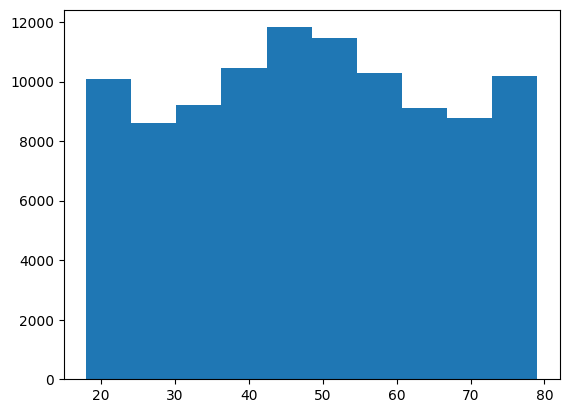

In [ ]:
plt.hist(df_corrected['Age'])

(array([10089.,  8619.,  9199., 10460., 11823., 11476., 10291.,  9095.,
         8770., 10178.]),
 array([18. , 24.1, 30.2, 36.3, 42.4, 48.5, 54.6, 60.7, 66.8, 72.9, 79. ]),
 <BarContainer object of 10 artists>)

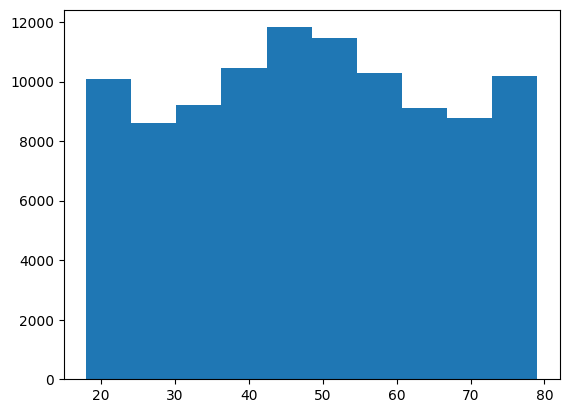

In [ ]:
plt.hist(df_corrected['Age'])

In [ ]:
df_corrected.isnull().sum()

Average Daily Steps    0
Hours of Sleep         0
Caloric Intake         0
Age                    0
Height                 0
Weight                 0
Cholesterol level      0
Blood Sugar level      0
dtype: int64

In [ ]:
column_to_merge = df_c_interpolated_KNN['Gender']

df_interpolate2 = pd.concat([df_corrected, column_to_merge], axis=1)

df_interpolate2

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Gender
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,Male
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,Female
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,Male
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,Female
4,7521.000000,6.433183,2342.0,50.545455,145.273232,62.574740,161.368583,126.408787,NaN
...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.431135,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,Male
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,Male
99997,8865.545455,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,Male
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,106.908491,140.865132,94.524506,Female


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
df_missing = df_interpolate2[df_interpolate2['Gender'].isna()]
df_not_missing = df_interpolate2[~df_interpolate2['Gender'].isna()]
logistic_regression = LogisticRegression()
print('this is df_not_missing')
print(df_missing)
print('this is df_not_missing')
print(df_not_missing)
logistic_regression.fit(df_not_missing[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']], df_not_missing['Gender'])

predicted_values = logistic_regression.predict(df_missing[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']])

# Replace the missing "Gender" values with the predicted values
df_interpolate2.loc[df_interpolate2['Gender'].isna(), 'Gender'] = predicted_values

this is df_not_missing
       Average Daily Steps  Hours of Sleep  Caloric Intake        Age  \
4              7521.000000        6.433183     2342.000000  50.545455   
18            11424.000000        6.344670     1118.000000  41.000000   
20            13413.000000        6.505656     3929.000000  39.000000   
23            10491.272727        4.143663     1747.000000  41.000000   
29             5303.000000        7.975367     3914.000000  38.000000   
...                    ...             ...             ...        ...   
99916         13350.636364        5.055937     1493.000000  32.000000   
99930          5139.000000        9.778847     3341.000000  21.000000   
99965         13894.000000        5.947483     1752.000000  76.000000   
99978          9304.000000        7.524464     3329.000000  52.000000   
99990         14357.000000        6.773970     2189.545455  53.000000   

           Height     Weight  Cholesterol level  Blood Sugar level Gender  
4      145.273232  62.57

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df_interpolate2

,Average Daily Steps,Hours of Sleep,Caloric Intake,Age,Height,Weight,Cholesterol level,Blood Sugar level,Gender
0,15725.000000,6.518042,1714.0,56.000000,178.416872,75.489346,185.408550,104.442836,Male
1,6733.000000,9.176300,2508.0,69.000000,176.826592,54.635484,191.698148,104.851888,Female
2,7424.000000,4.856772,1366.0,46.000000,182.281966,63.578372,212.625051,106.649132,Male
3,11853.000000,9.727244,2189.0,32.000000,168.520316,59.397202,205.440351,121.982302,Female
4,7521.000000,6.433183,2342.0,50.545455,145.273232,62.574740,161.368583,126.408787,Female
...,...,...,...,...,...,...,...,...,...
99995,2265.000000,7.431135,2030.0,53.000000,182.202253,65.035350,212.133380,115.360556,Male
99996,10959.000000,9.661165,2233.0,22.000000,185.802297,63.457075,227.699267,112.321197,Male
99997,8865.545455,7.378317,2080.0,37.000000,168.520316,41.227254,224.300704,121.369845,Male
99998,12110.000000,9.843323,1434.0,72.000000,155.025779,106.908491,140.865132,94.524506,Female


(array([50343.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 49657.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

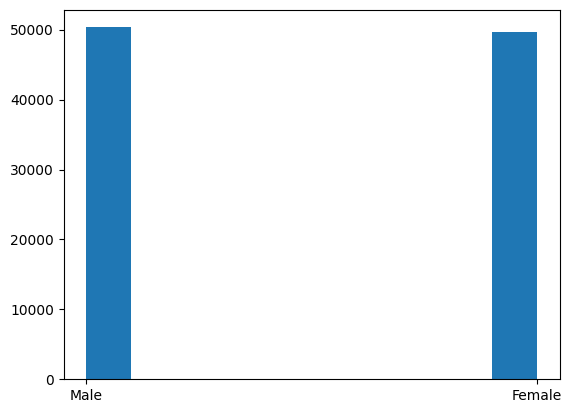

In [ ]:
plt.hist(df_interpolate2['Gender'])

In [ ]:
df_interpolate2.isnull().sum()

Average Daily Steps    0
Hours of Sleep         0
Caloric Intake         0
Age                    0
Height                 0
Weight                 0
Cholesterol level      0
Blood Sugar level      0
Gender                 0
dtype: int64

In [ ]:
df_interpolate2.to_csv('/content/drive/MyDrive/final_kNNimputer.csv', index=False)

In [ ]:
def detect_outliers(column, threshold=1.5):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers.tolist()

# Create a dictionary to store outliers
outliers_dict = {}

# Iterate through the columns and detect outliers
for column_name in ['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age']:
    outliers_dict[column_name] = detect_outliers(df_interpolate[column_name])

print("Outliers Dictionary:")
print(outliers_dict)



Outliers Dictionary:
{'Average Daily Steps': [], 'Hours of Sleep': [], 'Caloric Intake': [], 'Age': []}


In [ ]:
# # Define the outlier detection function using Z-scores
# def remove_outliers_zscore(df, threshold=3):
#     z_scores = np.abs(stats.zscore(df))
#     mask = (z_scores <= threshold).all(axis=1)
#     return df[mask]

# # Remove rows with outliers in each column using Z-scores
# threshold = 3  # Adjust this threshold as needed
# df_no_outliers = remove_outliers_zscore(df_interpolate, threshold)

# print("DataFrame with Outliers Removed (Z-score method):")
# print(df_no_outliers)

In [ ]:
from scipy import stats

In [ ]:
def remove_outliers(dataframe, columns, z_threshold=3):
    outlier_indices = set()

    for column in columns:
        z_scores = np.abs(stats.zscore(dataframe[column]))
        outlier_indices.update(set(np.where(z_scores > z_threshold)[0]))

    # Remove duplicate indices and sort them
    outlier_indices = list(outlier_indices)
    outlier_indices.sort()

    # Create a new DataFrame without the outlier rows
    cleaned_dataframe = dataframe.drop(outlier_indices)

    return cleaned_dataframe


In [ ]:
df_clean=remove_outliers(df_interpolate, [ 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level'], z_threshold=3)

print(df_clean)


df_diastol=df_interpolate[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Gender','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level','Diastolic BP']]
df_systol=df_interpolate[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Gender','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level','Systolic BP']]
df_lifestyle=df_interpolate[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Gender','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level','LifeStyle']]

df_systol=df_systol.dropna()
df_diastol=df_diastol.dropna()
df_lifestyle=df_lifestyle.dropna()


df_systol.to_csv('/content/drive/MyDrive/Systol_corrected.csv',index=False)
df_diastol.to_csv('/content/drive/MyDrive/diastol_corrected.csv',index=False)
df_lifestyle.to_csv('/content/drive/MyDrive/LifeStyle_corrected.csv',index=False)

       Average Daily Steps  Hours of Sleep  Caloric Intake   Age  Gender  \
0                  15725.0        6.518042          1714.0  56.0    Male   
1                   6733.0        9.176300          2508.0  69.0  Female   
2                   7424.0        4.856772          1366.0  46.0    Male   
3                  11853.0        9.727244          2189.0  32.0  Female   
4                   7521.0        6.433183          2342.0  28.5  Female   
...                    ...             ...             ...   ...     ...   
99995               2265.0        7.842720          2030.0  53.0    Male   
99996              10959.0        9.661165          2233.0  22.0    Male   
99997              11534.5        7.378317          2080.0  37.0    Male   
99998              12110.0        9.843323          1434.0  72.0  Female   
99999              18618.0        9.301179          3458.0  37.0    Male   

           Height      Weight  Cholesterol level  Blood Sugar level  \
0      178.41687

In [ ]:
path="/content/drive/MyDrive/LifeStyle_vayun.csv"
df=pd.read_csv(path)

In [ ]:
import numpy as np

In [ ]:
df["Gender"] = np.where(df["Gender"] == "Female", 0, 1)

In [ ]:
X =df[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']].copy()

y = df['LifeStyle']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()

In [ ]:
param_grid = {
    'n_estimators': [200, 500, 800],
    'max_depth': [10, 20, 30,50,75, None],
    'min_samples_split': [2, 5, 10,20],
}

In [ ]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=75, cv=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

In [ ]:
best_rf = random_search.best_estimator_

In [ ]:
y_pred = best_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
path="/content/drive/MyDrive/ML101_dataset_test_feature.csv"
df1=pd.read_csv(path)

In [ ]:
df1["Gender"] = np.where(df1["Gender"] == "Female", 0, 1)

y_pred_final = best_rf.predict(df1)

y_pred_final

df_3 = pd.DataFrame({'Predictions': y_pred_final})

df_3.to_csv('/content/drive/MyDrive/classification_final_submition_ml101.csv',index=True)

REGRESSION


Systolic Blood Pressure Prediction

In [ ]:
#Loading datasets for Regression

df_test = pd.read_csv("/content/drive/MyDrive/ML101_dataset_test_feature.csv")
path="/content/drive/MyDrive/ML101_dataset_test_feature.csv"
X_testing=pd.read_csv(path)
X_testing = pd.get_dummies(X_testing, columns=['Gender'], drop_first=True)
data = df_systol

In [ ]:
data= data[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Systolic BP']]
target_column = 'Systolic BP'

In [ ]:
#Eliminating the gaussian noise at the ends

Q1 = data[target_column].quantile(0.25)
Q3 = data[target_column].quantile(0.75)
IQR = Q3 - Q1
# Define a threshold for outliers
threshold = 1.2
#Outlier detection mask
outliers_mask = (data[target_column] < (Q1 - threshold * IQR)) | (data[target_column] > (Q3 + threshold * IQR))
# # Remove rows with outliers
df_cleaned = data[~outliers_mask]
# df_cleaned=data
X = df_cleaned[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Gender','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']]

y = df_cleaned['Systolic BP']

# One-Hot Encoding for Gender Atrribute
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=300, random_state=42) #Initializing the model (We used n_estimators=300 after running some experimental tries and found this value optimal)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
y_pred_test=model.predict(X_testing)

df_assigned=pd.DataFrame(y_pred_test,columns=['Systolic BP'])

df_assigned.to_csv("/content/drive/MyDrive/final_systolic_test.csv", index=False)

Diastolic Blood Pressure Prediction

In [ ]:
path="/content/drive/MyDrive/diastol_corrected.csv"
data=pd.read_csv(path)

df = data

df = df[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
       'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
       'Diastolic BP']]

In [ ]:
target_column = 'Diastolic BP'

# Calculate the IQR for the target column
Q1 = df[target_column].quantile(0.25)
Q3 = df[target_column].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.15

# Create a boolean mask to identify outliers
outliers_mask = (data[target_column] < (Q1 - threshold * IQR)) | (data[target_column] > (Q3 + threshold * IQR))

# # Remove rows with outliers
df_cleaned = data[~outliers_mask]

In [ ]:
X = df_cleaned[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age','Gender','Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']]
# print(X)
y = df_cleaned['Diastolic BP']
# If 'gender' is categorical (e.g., 'Male' and 'Female'), you need to one-hot encode it
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)  # Drop the first category to avoid multicollinearity

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=300, random_state=42)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/ML101_dataset_test_feature.csv")

# Preprocessing for test data (using the same preprocessor as training data)
X_test2 = df_test[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
                 'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']]

X_test2 = pd.get_dummies(X_test2, columns=['Gender'], drop_first=True)


# Make predictions on the test data
y_pred = model.predict(X_test2)

print(y_pred)
# Add predictions to the test data
df_test["Diastolic BP"] = y_pred

# # Save the data with predictions to a new CSV file
df_test.to_csv("/content/drive/MyDrive/test_with_predictions1.csv", index=False)

Combining The Systolic and Diastolic Predicted values

In [ ]:
# Load the first CSV file with the "Systolic BP" column
df_systolic = pd.read_csv('/content/drive/MyDrive/final_systolic_test.csv')

# Load the second CSV file with the "Diastolic BP" column
df_diastolic = pd.read_csv('/content/drive/MyDrive/test_with_predictions1.csv')

# Create a new DataFrame with both columns
df_combined = pd.concat([df_systolic['Systolic BP'], df_diastolic['Diastolic BP']], axis=1)

# Save the combined DataFrame to a new CSV file
df_combined.to_csv('/content/drive/MyDrive/combined_blood_pressure.csv', index=False)

The code below is of Ridge Regression which we tested alongside the random forest code, and skipped because Random Forest gives a better MSE score


In [ ]:
# data = pd.read_csv('Systol_corrected.csv')


# df = data

# df = df[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
#        'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level',
#        'Systolic BP']]

# target_column = 'Systolic BP'

# # Calculate the IQR for the target column
# Q1 = df[target_column].quantile(0.25)
# Q3 = df[target_column].quantile(0.75)
# IQR = Q3 - Q1

# # Define a threshold for outliers
# threshold = 10

# # Create a boolean mask to identify outliers
# outliers_mask = (df[target_column] < (Q1 - threshold * IQR)) | (df[target_column] > (Q3 + threshold * IQR))

# # Remove rows with outliers
# df_cleaned = df[~outliers_mask]




# # Load your dataset
# data = df_cleaned

# X = data.drop('Systolic BP', axis=1)
# y = data['Systolic BP']

# # If 'gender' is categorical, one-hot encode it
# X = pd.get_dummies(X, columns=['Gender'], drop_first=True)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a ColumnTransformer to preprocess the numeric and categorical features
# numeric_features = X_train.select_dtypes(include=['float64']).columns
# categorical_features = X_train.select_dtypes(exclude=['float64']).columns

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='first'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create a Ridge Regression model
# ridge_model = Ridge()

# # Create a Pipeline to combine preprocessing and modeling
# model = Pipeline(steps=[('preprocessor', preprocessor),
#                         ('model', ridge_model)])

# # Define a parameter grid for GridSearchCV
# param_grid = {
#     'model__alpha': [0.001, 0.01, 0.1, 1.0, 1.0]  # You can add more alpha values to fine-tune
# }

# # Create GridSearchCV with cross-validation
# grid_search = GridSearchCV(model, param_grid, cv=25, scoring='neg_mean_squared_error', verbose=1)

# df.columns = range(df.shape[1])

# # Fit the model with GridSearchCV to find the best hyperparameters
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Evaluate the best model on the test data
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"Best Model Parameters: {grid_search.best_params_}")
# print(f"Mean Squared Error: {mse}")
# print(f"R-squared: {r2}")

# print(y_test)
# print(y_pred)



# df_test = pd.read_csv("test.csv")

# # Preprocessing for test data (using the same preprocessor as training data)
# X_test2 = df_test[['Average Daily Steps', 'Hours of Sleep', 'Caloric Intake', 'Age',
#                  'Gender', 'Height', 'Weight', 'Cholesterol level', 'Blood Sugar level']]

# # X_test2 = pd.get_dummies(X_test2, columns=['Gender'], drop_first=True)

# # Make predictions on the test data
# y_pred = best_model.predict(X_test2)

# print(y_pred)
# # Add predictions to the test data
# # df_test["Predicted Systolic BP"] = y_pred

# # # Save the data with predictions to a new CSV file
# # df_test.to_csv("test_with_predictions.csv", index=False)